# Growth model

Here i simulate the basic growth model used by Charnov ect...

$$
\frac{dM}{dt} = aM^{\beta} - bM - cM^{\gamma}
$$

where $aM^{\beta}$ is energy intake with its mass scaling exponent, $bM$ is maintenece metabolism and $cM^{\gamma}$ is reproductive output.

the fitness ($R_0$) of an individual growing according to the model above can be obtained by integrating their reproductive output over time, including thier mortaility L(M):

$$
R_0 = \int_0^\infty cM^{\beta} L(M,t) dt
$$

This mortality function is set to an exponential decay function here:

$$
L(M,t) = e^{-\lambda Mt}
$$

where $\lambda$ is a rate parameter controling the rate at which the likelyhood of survival decreases.

I also consider the "switching on" of reproduction at some mass $M_{\alpha}$. This occurs instantly with a piecewise funtion for growth. 

In [8]:
using Pkg
# import Pkg; Pkg.add("DifferentialEquations")
# import Pkg; Pkg.add("DiffEqCallbacks")
# import Pkg; Pkg.add("Plots")
Pkg.activate("..")

using DifferentialEquations, DiffEqCallbacks, Plots

In [9]:
# function dM(dM,M,p,t)
#     intak = p[:a_0] * (abs(M[1]) ^ p[:a_b])
#     maint = p[:b_0] * (abs(M[1]) ^ p[:b_b])
    
#     if M[1] < p[:Ma] 
#         repro = 0.0
#     else
#         repro = p[:c_0] * (M[1] ^ p[:c_b])
#     end
        
#     dM[1] = intak - maint - repro
#     dM[2] = repro * exp(-t * p[:L])
    
# end

dM (generic function with 1 method)

In [9]:
function dM(dM,M,p,t)
    intak = p[:a_0] * (abs(M[1]) ^ p[:a_b])
    maint = p[:b_0] * (abs(M[1]) ^ p[:b_b])
    
    if M[1] < p[:Ma] 
        repro = 0.0
    else
        repro = p[:c_0] * (M[1] ^ p[:c_b])
    end
        
    dM[1] = intak - maint - repro
    dM[2] = repro * exp(-t * p[:L])
    
end

dM (generic function with 1 method)

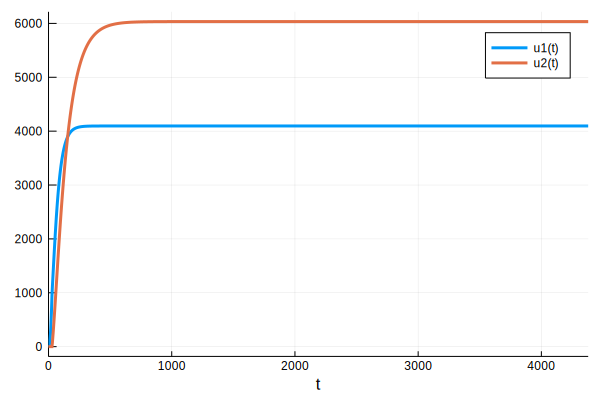

In [10]:


p = Dict([(:a_0,1.0),(:a_b,.75),
          (:b_0,0.1),(:b_b,1.0),
          (:c_0,0.2),(:c_b,0.75),
          (:L,0.01),(:Ma,1000.0)])

M0 = [1.,0.0]
tspan = (0.0,365 * 12)
prob = ODEProblem(dM,M0,tspan,p)
sol = solve(prob,Rosenbrock23())

plot(sol)

In [13]:
N_sim = 100
results = Array{Float64,2}(undef,N_sim,N_sim)

a_vec = range(0,maximum(M_eq)+1,length = N_sim)

for i = 1:N_sim
    for j = 1:N_sim
        if a_vec[i] <= M_eq[j]
            p = Dict([(:a_0,1.0),(:a_b,.75),
              (:b_0,0.1),(:b_b,1.0),
              (:c_0,0.6),(:c_b,c_b_vec[j]),
              (:L,0.1),(:Ma,a_vec[i])])
            
            prob = ODEProblem(dM,M0,tspan,p)
            sol = solve(prob,AutoTsit5(Rosenbrock23()),callback = cb)
            
            results[i,j] = sol[2,end]
        else
            results[i,j] = 0.0
        end
        
    
    end
end

heatmap(c_b_vec,a_vec,results)

UndefVarError: UndefVarError: M_eq not defined

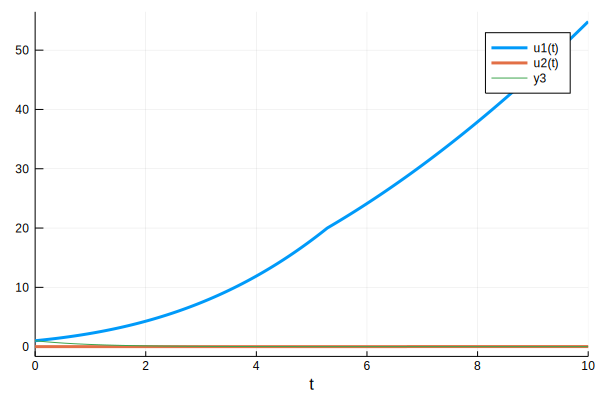

In [14]:
p = Dict([(:a_0,1.0),(:a_b,.75),
          (:b_0,0.1),(:b_b,1.0),
          (:c_0,0.1),(:c_b,1.0),
          (:L,1),(:Ma,20)])
M0 = [1.,0.0]
tspan = (0.0,10)
prob = ODEProblem(dM,M0,tspan,p)
cb = CallbackSet(TerminateSteadyState())
sol = solve(prob,Rosenbrock23(),callback = cb)

plot(sol)
plot!(sol.t,1 .* exp.(-sol.t / p[:L] ))